#**Desafio Challenge Probabilidade e Amostragem.**

##**Desafio 1: Entendendo o consumidor.**



Suponha que voc√™ trabalha em uma empresa de produtos de beleza populares e, com
a pandemia, voc√™ suspeita que o perfil de seus clientes mudou. 
O time de marketing, pediu a sua ajuda e gostaria de entender se:
1. isso de fato aconteceu e 
2. quais as diferen√ßas do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus an√∫ncios. 
Para isso, eles te enviaram a base de dados(desafio_01_consumidor.csv). 
Como voc√™ poderia ajud√°-los?

Para responder esse desafio:

A base de dados: desafio_01_consumidor.csv cont√©m informa√ß√µes de seus clientes
(anonimizados) no per√≠odo pr√© e p√≥s pandemia. A coluna "pr√©-pandemia" indica se o dado √© pr√©-pandemia ou n√£o, sendo 1, caso positivo ou 0 caso negativo.
Dica / Passo a Passo:
1. Entenda a distribui√ß√£o de vari√°veis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia

  a. Identifique as distribui√ß√µes

  b. Plote histogramas / boxplots

2. Voc√™ notou diferen√ßas n√≠tidas pr√© e p√≥s pandemia? Como voc√™ poderia
provar estatisticamente que essas diferen√ßas s√£o significativas ? (pergunta
extra)
3. Suponha agora que os dados recebidos s√£o somente uma amostra da sua
popula√ß√£o total de clientes. Suponha que a sua "popula√ß√£o" de clientes
verdadeira √© de 100000. Qual o tamanho da amostra necess√°ria para
chegarmos a conclus√µes com 95% de confian√ßa e 2% de margem de erro? A
base informada √© suficiente? E com uma margem de erro de 10%?

**Importando Bibliotecas**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Leitura dos dados**

In [2]:
df = pd.read_csv('desafio01consumidor-230209-165113.csv')

**Visualizando os Dados**

In [3]:
df.head()

id_cliente  idade  renda      produto     regiao-BR  pre-pandemia
0  XXXXXXX72     30   7452        batom       Sudeste             1
1  XXXXXXX15     59    837  desodorante      Nordeste             1
2  XXXXXXX70     28   3231       sombra  Centro-Oeste             1
3  XXXXXXX99     27   5409        batom           Sul             1
4  XXXXXXX98     24   1142        batom       Sudeste             1

**Verificando o tamanho do Dataset**

In [4]:
df.shape

(203, 6)

**Verificando as informa√ß√µes dos tipos de Dados**

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


**Estatisticas Descritivas**

In [7]:
df.describe().round(2)

idade     renda  pre-pandemia
count  203.0    203.00         203.0
mean    42.4  11586.36           0.5
std     14.4   6288.02           0.5
min     15.0    110.00           0.0
25%     31.0   6705.00           0.0
50%     41.0  11145.00           0.0
75%     53.0  15590.50           1.0
max     80.0  30000.00           1.0

1. Entenda a distribui√ß√£o de vari√°veis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

  a. Identifique as distribui√ß√µes
  
  b. Plote histogramas / boxplots

In [8]:
dist = df[['idade', 'renda', 'regiao-BR', 'produto']].value_counts()
dist

idade  renda  regiao-BR     produto    
15     9910   Sudeste       batom          1
49     8201   Nordeste      sombra         1
47     13743  Norte         antissinais    1
       15827  Centro-Oeste  antissinais    1
       22927  Norte         antissinais    1
                                          ..
36     11100  Nordeste      desodorante    1
       11713  Nordeste      sombra         1
       12755  Sul           desodorante    1
       14108  Nordeste      desodorante    1
80     15969  Centro-Oeste  sombra         1
Length: 203, dtype: int64

In [9]:
df[df['pre-pandemia'] == 1].value_counts().sort_values(ascending=False).round(4)

id_cliente  idade  renda  produto      regiao-BR  pre-pandemia
XXXXXXX10   42     6891   batom        Sul        1               1
XXXXXXX47   36     19226  batom        Nordeste   1               1
XXXXXXX13   34     3118   desodorante  Nordeste   1               1
XXXXXXX14   24     7996   batom        Sudeste    1               1
            26     13770  batom        Sudeste    1               1
                                                                 ..
XXXXXXX98   24     1142   batom        Sudeste    1               1
            47     22927  antissinais  Norte      1               1
XXXXXXX99   27     5409   batom        Sul        1               1
            53     18104  batom        Sul        1               1
            55     18864  batom        Sul        1               1
Length: 101, dtype: int64

In [10]:
df[df['pre-pandemia'] == 1].min()

id_cliente         XXXXXXX10
idade                     16
renda                    110
produto          antissinais
regiao-BR       Centro-Oeste
pre-pandemia               1
dtype: object

In [11]:
df[df['pre-pandemia'] == 1].max()

id_cliente      XXXXXXX99
idade                  80
renda               24090
produto            sombra
regiao-BR             Sul
pre-pandemia            1
dtype: object

In [12]:
df[df['pre-pandemia'] == 0].value_counts().sort_values(ascending=False).round(4)

id_cliente  idade  renda  produto      regiao-BR  pre-pandemia
XXXXXXX10   46     7521   antissinais  Norte      0               1
XXXXXXX21   36     17837  desodorante  Sul        0               1
XXXXXXX14   62     10964  desodorante  Sul        0               1
XXXXXXX17   31     11180  desodorante  Sul        0               1
            36     12755  desodorante  Sul        0               1
                                                                 ..
XXXXXXX92   58     15278  desodorante  Sul        0               1
XXXXXXX93   43     11007  desodorante  Sudeste    0               1
XXXXXXX94   54     12025  desodorante  Sul        0               1
XXXXXXX99   33     17969  sombra       Nordeste   0               1
            37     12617  desodorante  Sul        0               1
Length: 102, dtype: int64

In [13]:
df[df['pre-pandemia'] == 0].min()

id_cliente         XXXXXXX10
idade                     15
renda                   1995
produto          antissinais
regiao-BR       Centro-Oeste
pre-pandemia               0
dtype: object

In [14]:
df[df['pre-pandemia'] == 0].max()

id_cliente      XXXXXXX99
idade                  77
renda               30000
produto            sombra
regiao-BR             Sul
pre-pandemia            0
dtype: object

b. Plote histogramas / boxplots

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'renda'}>],
       [<Axes: title={'center': 'pre-pandemia'}>, <Axes: >]], dtype=object)

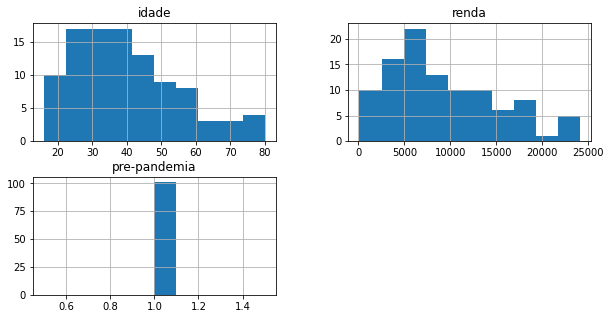

In [15]:
df[df['pre-pandemia'] == 1].hist(bins = 10, figsize=(10,5))

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'renda'}>],
       [<Axes: title={'center': 'pre-pandemia'}>, <Axes: >]], dtype=object)

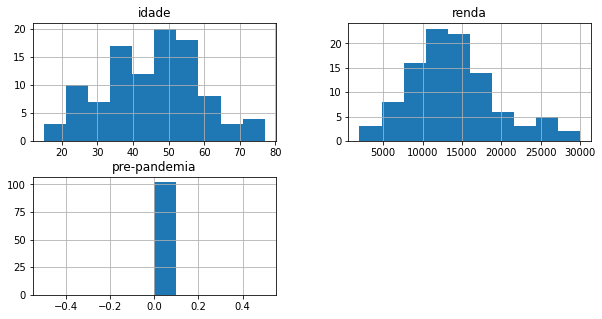

In [16]:
df[df['pre-pandemia'] == 0].hist(bins = 10, figsize=(10,5))

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'renda'}>],
       [<Axes: title={'center': 'pre-pandemia'}>, <Axes: >]], dtype=object)

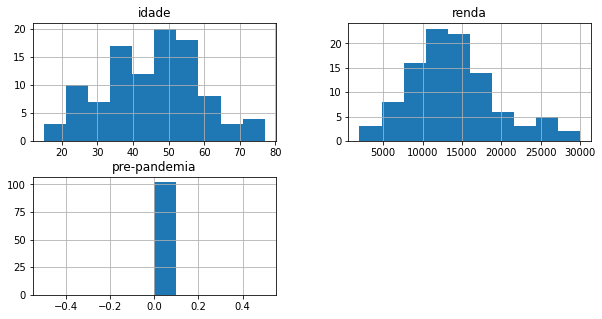

In [17]:
df[df['pre-pandemia'] == 0].hist(bins = 10, figsize=(10,5))

<Axes: title={'center': 'Distribui√ß√£o das vendas por idade'}, xlabel='produtos', ylabel='pre-pandemia'>

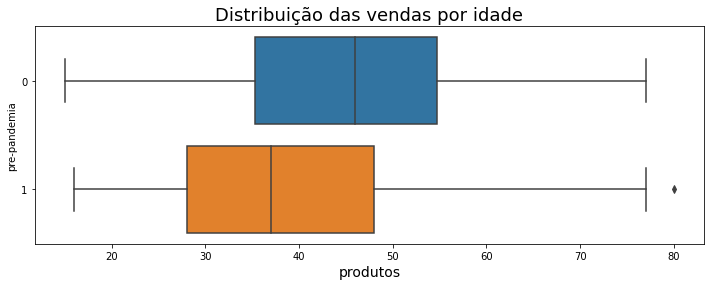

In [18]:
ax = sns.boxplot(x = 'idade', y = 'pre-pandemia', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribui√ß√£o das vendas por idade', fontsize=18)
ax.set_xlabel('produtos', fontsize=14)
ax

<Axes: title={'center': 'Distribui√ß√£o da Renda das clientes'}, xlabel='Reais (R$)'>

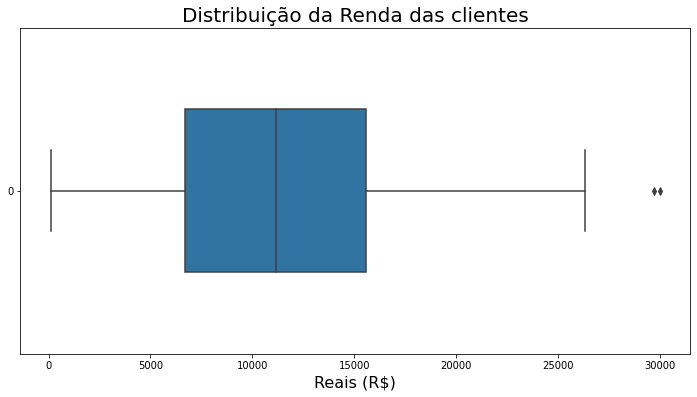

In [19]:
ax = sns.boxplot(data=df.renda, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribui√ß√£o da Renda das clientes', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

2. Voc√™ notou diferen√ßas n√≠tidas pr√© e p√≥s pandemia? Como voc√™ poderia provar estatisticamente que essas diferen√ßas s√£o significativas ? (pergunta extra)

In [20]:
df[df['pre-pandemia'] == 1].mean()

<ipython-input-20-dbc8354e95cd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['pre-pandemia'] == 1].mean()


idade             39.881188
renda           9180.643564
pre-pandemia       1.000000
dtype: float64

In [21]:
df[df['pre-pandemia'] == 0].mean()

<ipython-input-21-54b28ece4506>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['pre-pandemia'] == 0].mean()


idade              44.901961
renda           13968.500000
pre-pandemia        0.000000
dtype: float64

**Aplicar o Teste de normalidade - normaltest**

In [22]:
from scipy.stats import normaltest

In [23]:
normaltest(df['pre-pandemia'])

NormaltestResult(statistic=1087.6907447044205, pvalue=6.470767250750225e-237)

In [24]:
significancia = 0.02

**Crit√©rio do valor**

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [25]:
stat_test, p_valor = normaltest(df['pre-pandemia'])
print(stat_test)
print(p_valor)

1087.6907447044205
6.470767250750225e-237


In [26]:
p_valor <= significancia

True

**O p_valor √© (>)maior (p‚â§0,05), portanto n√£o devemos rejeitar $H_0$, trata-se de uma distribui√ß√£o normal.**

3. Suponha agora que os dados recebidos s√£o somente uma amostra da sua popula√ß√£o total de clientes. Suponha que a sua "popula√ß√£o" de clientes verdadeira √© de 100000. Qual o tamanho da amostra necess√°ria para chegarmos a conclus√µes com 95% de confian√ßa e 2% de margem de erro? A base informada √© suficiente? E com uma margem de erro de 10%?

In [27]:
from scipy.stats import norm

In [28]:
N = 100000
N

100000

In [29]:
confianca = 0.95
confianca

0.95

In [30]:
e = 0.02
e

0.02

In [31]:
erro_percentual = 0.10
erro_percentual

0.1

### Tamanho da amostra ($1 - \alpha = 95\%$)

In [32]:
0.5 + (0.95 / 2)

0.975

In [33]:
z = norm.ppf(0.975)
z

1.959963984540054

##**Desafio 2: Determinando o Estoque de Seguran√ßa.**

Suponha agora que voc√™ trabalha em uma empresa de produtos perec√≠veis, como
Danone ou Nestl√©. Para a empresa, √© muito importante que a sua pol√≠tica de estoque seja eficiente. √â necess√°rio manter um estoque de seguran√ßa em todos os produtos(acima da previs√£o de vendas), pois, caso contr√°rio, as pessoas podem n√£o encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem n√£o ser comprados, e consequentemente, jogados fora, o que na ind√∫stria se chama
"desova".

Para achar o equil√≠brio perfeito, o gerente de vendas pediu a ajuda a voc√™, do time de an√°lise de dados, e ele gostaria de saber qual o estoque de seguran√ßa ideal. Para responder esse desafio, antes vamos abordar alguns conceitos importantes na ind√∫stria:

‚óè Estoque de seguran√ßa: √© uma quantidade de estoques que se tem, mas que
n√£o se deseja usar. √â como um seguro do carro: √© bom ter um, mas voc√™
n√£o quer precisar us√°-lo. Isto porque ele √© calculado apenas para suprir
uma seguran√ßa em casos de varia√ß√µes inesperadas, algo que voc√™ n√£o pode
prever ou controlar: problemas no fornecedor, atrasos na entrega, uma
demanda que n√£o foi prevista‚Ä¶

‚óè Demanda: se a demanda √© bem est√°vel e conhecida com anteced√™ncia,
ent√£o temos pouca variabilidade a cada m√™s e n√£o precisamos nos proteger
muito contra essas varia√ß√µes (pois sabemos que elas n√£o ocorrem); por
outro lado, se seu produto tem uma variabilidade nas vendas muito grande,
ent√£o precisaremos de estoque de seguran√ßa maior. Isto tudo √© medido
matematicamente atrav√©s do desvio padr√£o da demanda, que neste caso √©
calculado como o desvio padr√£o da previs√£o da demanda. Um bom sistema
de previs√µes √© capaz de oferecer este n√∫mero, ou ele pode ser estimado de
maneiras mais simples, mas menos precisas.

‚óè Lead time (tempo de entrega) do produto: se o tempo de entrega √© elevado
e sua variabilidade √© alta (se uma entrega √© feita em 5 dias, outra em 8 dias,
outra em 2 dias), ent√£o √© preciso ter uma seguran√ßa frente √† este tempo
m√©dia de entrega de 5 dias, pois algumas vezes ela chega a demorar 8 dias.
Mas n√£o queremos nos planejar sempre para receber apenas depois de 8
dias, pois isto acarretaria custos muito altos, ent√£o o estoque de seguran√ßa
utiliza a estat√≠stica para auxiliar nessa tarefa.

‚óè N√≠vel de servi√ßo desejado: nem todos os produtos merecem a mesma
aten√ß√£o e o mesmo cuidado; alguns produtos s√£o cr√≠ticos, mais importantes
ou mais atrativos, e por isso merecem estar sempre presentes, enquanto
em outros produtos podemos nos dar ao luxo de n√£o t√™-lo em estoque
sempre. Matematicamente, isto √© modelado atrav√©s do n√≠vel de servi√ßo
desejado: quanto maior o n√≠vel de servi√ßo (um n√∫mero percentual de 0 a
100), maior ser√° o estoque de seguran√ßa pois queremos mais garantias que
o produto estar√° sempre dispon√≠vel. O n√≠vel de servi√ßo depende de cada
setor: palitos de f√≥sforo num supermercado n√£o devem ter n√≠vel de servi√ßo
muito alto, enquanto antibi√≥ticos numa farm√°cia hospitalar devem ter n√≠vel
de servi√ßo alt√≠ssimo. O n√≠vel de servi√ßo indica o quanto queremos estar
seguros frente √†s variabilidades que ocorrem, em outras palavras, frente
aos desvios padr√µes da demanda e do lead time.

‚óè A F√≥rmula M√£e do Estoque de seguran√ßa:
A maioria das ind√∫strias calcula o estoque de seguran√ßa tomando como
base a distribui√ß√£o normal. Assumindo que suas vendas seguem essa
distribui√ß√£o, ela ir√° determinar qual a probabilidade de se vender certo
produto.



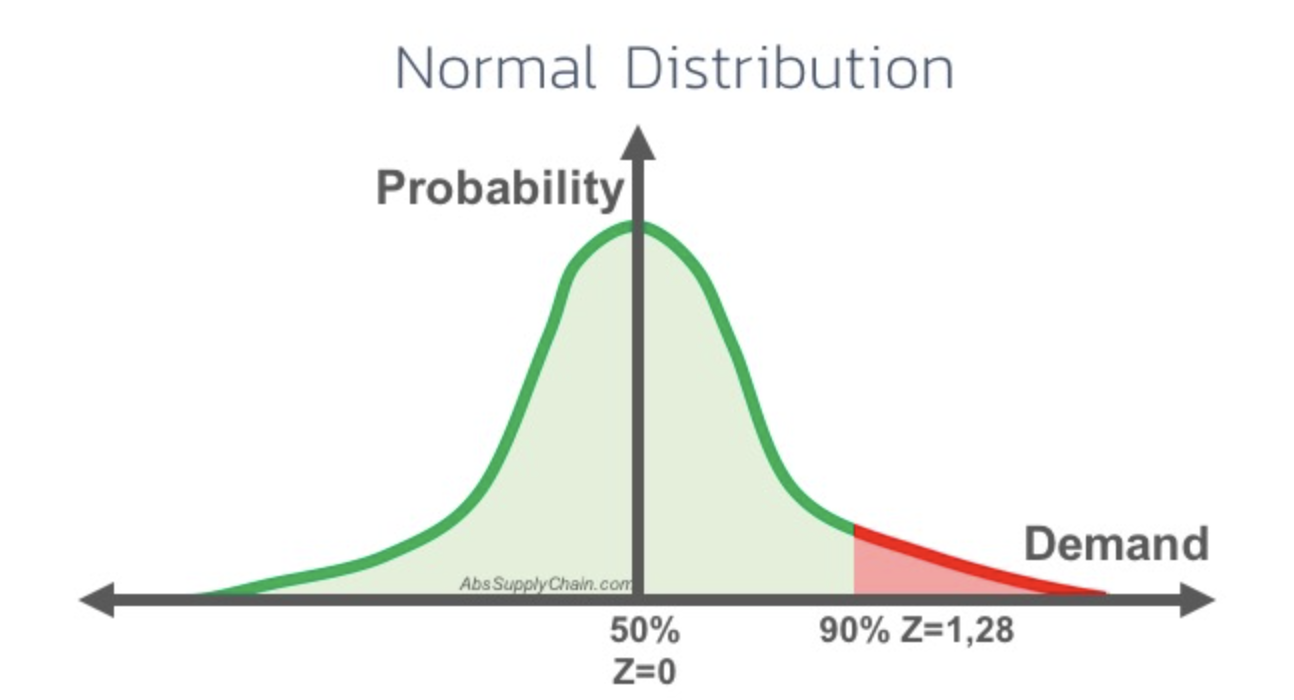

Por exemplo, se voc√™ vende na m√©dia 1000 unidades de produto por
semana, a distribui√ß√£o mostra que voc√™ tem uma alta probabilidade de
vender em torno de 1000 todas as semanas, e uma baixa probabilidade de
esse n√∫mero ser 20 ou 200000 de produtos vendidos.

Assim, voc√™ pode utilizar a distribui√ß√£o normal, para entender qual o seu
n√≠vel de servi√ßo desejado. Ou seja, se voc√™ deseja um n√≠vel de servi√ßo de
90%, a curva normal ir√° te fornecer o multiplicador desejado (varia√ß√µes da
m√©dia) para voc√™ alcan√ßar 90% da demanda.

Portanto, matematicamente, podemos determinar o estoque de seguran√ßa
utilizando os conceitos abordados em estat√≠stica, como a tabela da
distribui√ß√£o normal, utilizando a f√≥rmula abaixo.


Estoque de Seguran√ßa =
# $$Z * \sqrt{\sigma^2_dt + \sigma^2_td^2}$$ 


sendo :

z = o valor da tabela da distribui√ß√£o normal, que indica a quantos desvios
padr√µes ao redor da m√©dia temos que tomar para cobrir a propor√ß√£o da
√°rea sob a curva normal /n√≠vel de servi√ßo desejado.

d = demanda m√©dia passada ou estimada

t = lead time m√©dio.

œÉ = desvio padr√£o / varia√ß√£o da demanda ùëë

œÉ = desvio padr√£o / varia√ß√£o do lead time ùë°

Assim se o tempo de entrega tiver pouca variabilidade a f√≥rmula pode ser
aproximada por :



Estoque de Seguran√ßa =
# $$Z * \sqrt{\sigma^2_dt}$$ 

e a intui√ß√£o da f√≥rmula pode ser vista como : O quanto de varia√ß√£o da
m√©dia da demanda eu estou disposto a aceitar al√©m do natural (z-score do
n√≠vel de servi√ßo) 
* desvio m√©dio da demanda que j√° ocorre naturalmente 
* tempo de entrega.

Matematicamente o valor obtido pela f√≥rmula deve ser sempre
arredondado para cima, para garantir que estamos cobertos contra
varia√ß√µes indesejadas.

Dados esses conceitos vamos ao passo a passo do desafio.
O gerente de vendas te enviou o arquivo desafio_02_estoque.csv contendo os
dados de vendas de iogurte e o lead time de 2015 a 2022.

1. Analise os dados das vendas e do lead time. Eles seguem uma distribui√ß√£o
normal? Que caracter√≠sticas voc√™ identificou para chegar a essa conclus√£o?

2. Assuma que:

  a. Os dados seguem uma distribui√ß√£o normal.

  b. O time de vendas utilize para o produto em quest√£o o n√≠vel de servi√ßo
de 99,87%

  c. O produto n√£o tem sazonalidade (todos os meses vende valores pr√≥ximos) e a demanda m√©dia passada √© uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de seguran√ßa desejado.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df2 = pd.read_csv('desafio_02_estoque-230209-165113.csv')

In [36]:
df2.head()

data  vendas-iogurte  lead-time
0  2015-01-04            5083          4
1  2015-01-11            4936          3
2  2015-01-18            5051          6
3  2015-01-25            4846          4
4  2015-02-01            5003          5

In [37]:
df2.shape

(370, 3)

In [38]:
df2.describe().round(2)

vendas-iogurte  lead-time
count          370.00     370.00
mean          4999.17       5.09
std             77.29       1.58
min           4811.00       1.00
25%           4947.00       4.00
50%           4996.00       5.00
75%           5054.00       6.00
max           5233.00       9.00

**1. Analise os dados das vendas e do lead time. Eles seguem uma distribui√ß√£o normal? Que caracter√≠sticas voc√™ identificou para chegar a essa conclus√£o?**

In [39]:
df2[['vendas-iogurte']].value_counts()

vendas-iogurte
5020              6
4952              5
4932              5
4963              5
4968              5
                 ..
4967              1
4969              1
4970              1
4977              1
5233              1
Length: 207, dtype: int64

In [40]:
df2[['lead-time']].value_counts()

lead-time
5            89
6            79
4            77
7            50
3            37
8            14
2            13
9             6
1             5
dtype: int64

*A fun√ß√£o normaltest testa a hip√≥tese nula  H0  de que a amostra √© proveniente de uma distribui√ß√£o normal.*

In [41]:
from scipy.stats import normaltest

In [42]:
normaltest(df2[['vendas-iogurte']])

NormaltestResult(statistic=array([1.85754489]), pvalue=array([0.39503834]))

In [43]:
stat_test, p_valor = normaltest(df2[['vendas-iogurte']])
print(stat_test)
print(p_valor)

[1.85754489]
[0.39503834]


In [44]:
normaltest(df2[['lead-time']])

NormaltestResult(statistic=array([0.32506746]), pvalue=array([0.84998742]))

In [45]:
stat_test, p_valor = normaltest(df2[['lead-time']])
print(stat_test)
print(p_valor)

[0.32506746]
[0.84998742]


In [46]:
p_valor <= significancia

array([False])

**Crit√©rio do valor**

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

**O p_valor √© (>)maior (p‚â§0,05), portanto n√£o devemos rejeitar $H_0$, trata-se de uma distribui√ß√£o normal.**

2. Assuma que:

  a. Os dados seguem uma distribui√ß√£o normal.

  b. O time de vendas utilize para o produto em quest√£o o n√≠vel de servi√ßo
de 99,87%

  c. O produto n√£o tem sazonalidade (todos os meses vende valores pr√≥ximos) e a demanda m√©dia passada √© uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de seguran√ßa desejado.

In [47]:
d = 4999.17
t = 5.09
œÉ = 5972.98
œÉ = 2.49
z = norm.ppf(0.995)

In [48]:
sazonalidade = norm.ppf(0.995)*np.sqrt(œÉ**2/d*t).round(4)
sazonalidade

0.20477842963213758

In [49]:
estoq_seg = z*np.sqrt((œÉ**2/d)*t + (œÉ**2/t)*(d**2))
estoq_seg

14212.007925908823